# <b>ACCEPTANCE - REJECTION METHOD</b>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Example 8.6: Rejection Sampling with Beta(4,3) Distribution
Consider the <b>Beta(4,3)</b> distribution on the unit interval, with density function:


#### $$ f(x) = 60x^3(1-x)^2, \quad 0 \leq x \leq 1 $$


Since the distribution function $F(x)$ is a sixth-degree polynomial, the inverse-transform approach would not be simple, involving numerical methods to find polynomial roots. Instead, we can use rejection sampling to generate random variates from this distribution.

### <b>Algorithm</b>

 -- Generate $Y$ from a uniform distribution on $(0,1)$.

 -- Generate $U$ from a uniform distribution on $(0,1)$.

 -- If $U \leq \frac{60Y^3(1-Y)^2}{2.0736}$, then return $X = Y$. Otherwise, go back to step 1.
<br>

<br>

To implement this algorithm, we need to find a majorizing function $t(x)$ for $f(x)$, and a constant $c$ such that $t(x) \geq cf(x)$ for all $x \in [0,1]$.

We can show that the maximum value of $f(x)$ occurs at $x = 0.6$, where $f(0.6) = 2.0736$. Thus, we can define 
#### $$ t(x) = 2.0736, \quad 0 \leq x \leq 1 $$
This function majorizes $f(x)$, since $t(x) \geq f(x)$ for all $x \in [0,1]$.

The constant $c$ can be found by integrating $t(x)$ over the interval $[0,1]$:

#### $$ c = \int_0^1 t(x) dx = \int_0^1 2.0736 dx = 2.0736 $$

Therefore, we can use the uniform distribution on $(0,1)$ as our comparison distribution, since the density function $r(x)$ for this distribution is simply:

#### $$ r(x) = 2.0736, \quad 0 \leq x \leq 1 $$

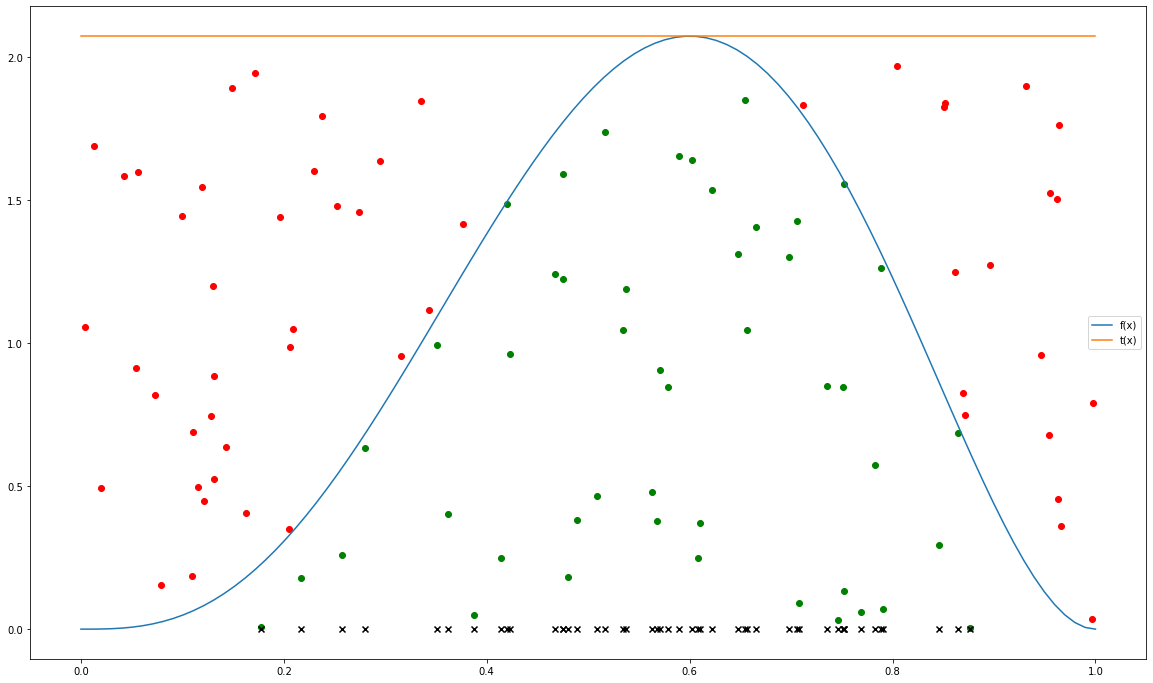

In [19]:
def f(x):
    return 60 * x**3 * (1-x)**2

Y = np.random.uniform(0, 1, 100)
UtY = [np.random.rand() * 2.0736 for i in Y]

# Plot the function
x = np.linspace(0,1,100)
plt.figure(figsize=(20, 12))
plt.plot(x, f(x))
plt.plot(x, [2.0736 for i in x])

for i in range(len(Y)):
    if UtY[i] < f(Y[i]):
        plt.scatter(Y[i], UtY[i], color='green')
        plt.scatter(Y[i], 0, color='black', marker='x')
    else:
        plt.scatter(Y[i], UtY[i], color='red')

# legend
plt.legend(['f(x)', 't(x)'])

plt.show()